**Zoning of Mobile Home Parks in El Monte**

In [ ]:
This notebook conducts a spatial join of open mobile home parks in City of El Monte to identify what their location is zoned as or what surronding land uses are. This notebook uses data from 


In [10]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [11]:
zoning = gpd.read_file('elmonte_zoning.geojson')

In [23]:
open = gpd.read_file('MHP_geocoded.geojson')

In [85]:
# reproject to web mercator
zoning_wm = zoning.to_crs(epsg=3857)

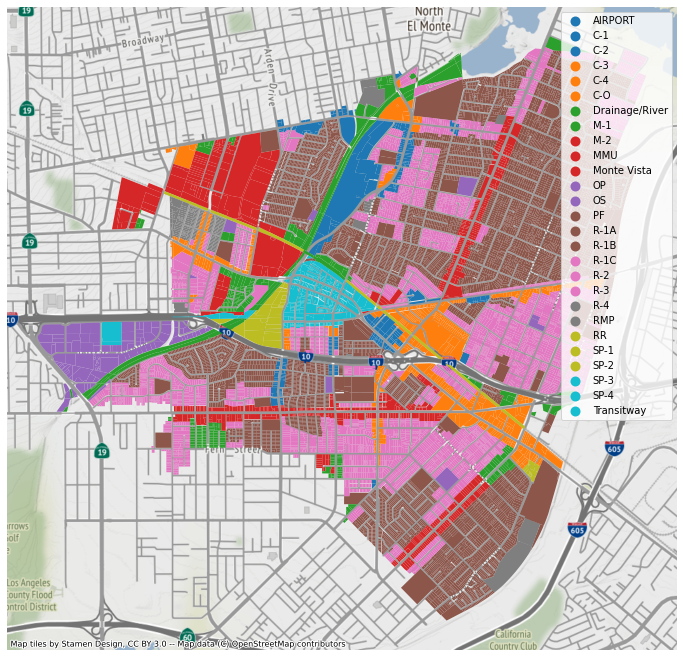

In [101]:
fig, ax = plt.subplots(figsize=(12,12))

zoning_wm.plot(ax=ax,
                      figsize=(20,40),
                      column='PROP_ZONE',
                      legend=True)

ax.axis('off')

ctx.add_basemap(ax)

In [40]:
zoning.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16684 entries, 0 to 16683
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   OBJECTID_12                      16684 non-null  int64   
 1   OBJECTID_1                       0 non-null      object  
 2   OBJECTID                         16680 non-null  float64 
 3   CURR_GP                          16680 non-null  object  
 4   PF_TYPE                          16680 non-null  object  
 5   PROP_GP                          16684 non-null  object  
 6   FOCUS_AREA                       16680 non-null  object  
 7   AIN_1                            16680 non-null  object  
 8   CHANGE                           16680 non-null  object  
 9   PROP_ZONE                        16684 non-null  object  
 10  SA_HOUSE_1                       16680 non-null  object  
 11  SA_STREET1                       16680 non-null  object  
 

In [87]:
# trim the data to the bare minimum
zoning = zoning[['PROP_ZONE', 'EXIST_LU_1', 'NEIGH_AREA', 'Shape.STLength()', 'geometry']]

In [88]:
# rename the columns
zoning.columns = ['zone','building type','neighborhood area', 'shape.st.lenght', 'geometry']

In [89]:
zoning.tail()

,zone,building type,neighborhood area,shape.st.lenght,geometry
16679,OP,Senior High School,Mountain View,2394.824288,"POLYGON ((-118.06536 34.06750, -118.06536 34.0..."
16680,OP,Senior High School,Mountain View,868.201541,"POLYGON ((-118.06039 34.06935, -118.06039 34.0..."
16681,OP,Senior High School,Mountain View,1709.936052,"POLYGON ((-118.06693 34.07036, -118.06699 34.0..."
16682,PF,Senior High School,Mountain View,2550.138849,"POLYGON ((-118.03853 34.08321, -118.03849 34.0..."
16683,PF,Senior High School,Mountain View,2804.305971,"POLYGON ((-118.04357 34.08929, -118.04253 34.0..."


In [90]:
zoning.head()

,zone,building type,neighborhood area,shape.st.lenght,geometry
0,R-3,"Low-Rise Apartments, Condos, Townhomes",Mountain View,184.403541,"POLYGON ((-118.03326 34.06167, -118.03338 34.0..."
1,R-3,"Low-Rise Apartments, Condos, Townhomes",Mountain View,178.502022,"POLYGON ((-118.03351 34.06167, -118.03362 34.0..."
2,C-3,Modern Strip Development,Mountain View,413.621314,"POLYGON ((-118.03071 34.06138, -118.03071 34.0..."
3,R-3,Mixed Multi-Family Residential,Mountain View,167.401483,"POLYGON ((-118.02472 34.06145, -118.02478 34.0..."
4,R-3,"Low-Rise Apartments, Condos, Townhomes",Mountain View,189.602819,"POLYGON ((-118.03333 34.06137, -118.03333 34.0..."


In [92]:
zoning.zone.value_counts().head(10).index.tolist()

['R-1A', 'R-3', 'R-1B', 'R-2', 'MMU', 'C-3', 'SP-4', 'M-1', 'R-1C', 'C-2']

In [93]:
top10_zoning = zoning.zone.value_counts().head(10).index.tolist()
top10_zoning

['R-1A', 'R-3', 'R-1B', 'R-2', 'MMU', 'C-3', 'SP-4', 'M-1', 'R-1C', 'C-2']

In [94]:
zoning.zone.value_counts()

R-1A              4364
R-3               4173
R-1B              3859
R-2               1293
MMU                554
C-3                500
SP-4               342
M-1                329
R-1C               214
C-2                211
R-4                201
M-2                142
OP                 117
C-O                 75
PF                  71
Drainage/River      50
C-1                 44
C-4                 38
SP-1                32
OS                  16
SP-2                15
AIRPORT             14
RR                  14
RMP                  6
Transitway           6
SP-3                 3
Monte Vista          1
Name: zone, dtype: int64

In [95]:
zone_count = zoning['zone'].value_counts()

In [96]:
zone_count

R-1A              4364
R-3               4173
R-1B              3859
R-2               1293
MMU                554
C-3                500
SP-4               342
M-1                329
R-1C               214
C-2                211
R-4                201
M-2                142
OP                 117
C-O                 75
PF                  71
Drainage/River      50
C-1                 44
C-4                 38
SP-1                32
OS                  16
SP-2                15
AIRPORT             14
RR                  14
RMP                  6
Transitway           6
SP-3                 3
Monte Vista          1
Name: zone, dtype: int64

<AxesSubplot:title={'center':'Most Common Land Use Zones'}>

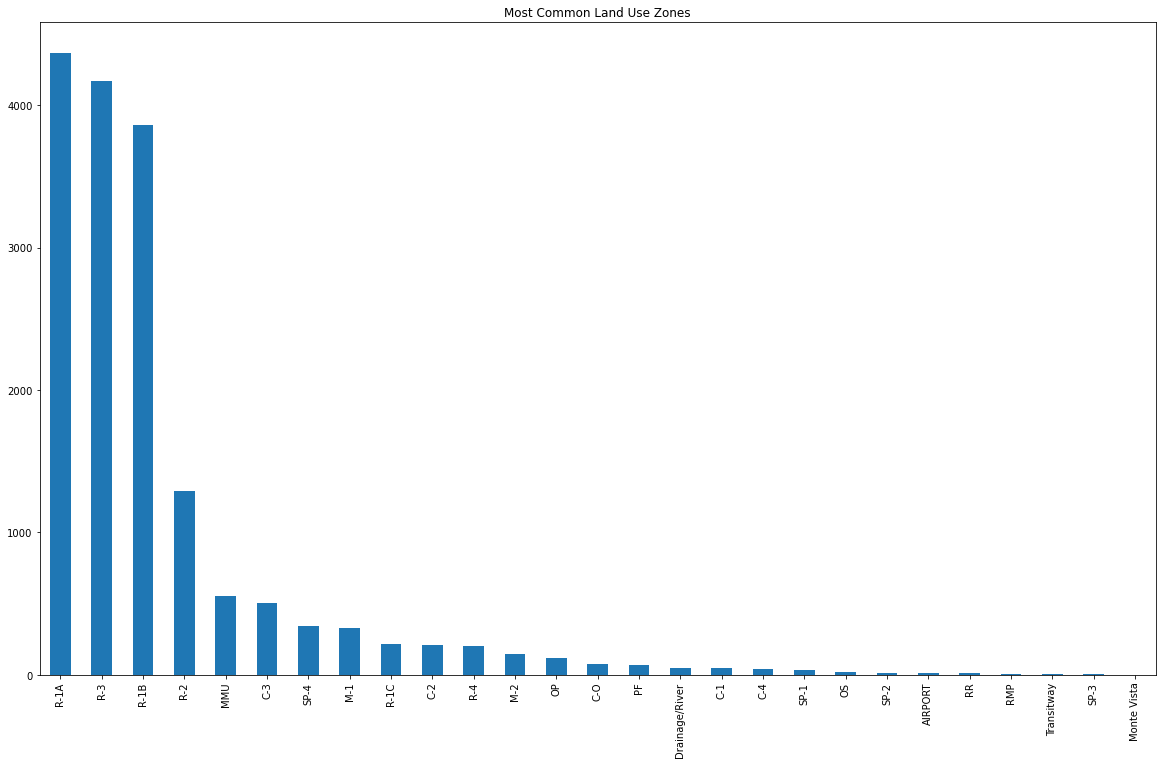

In [100]:
zone_count.plot.bar(
    figsize=(20,12), x = 'buildnng type', y = 'count', title = 'Most Common Land Use Zones')

Based on this histogram I can see that the top three zoning classifications for parcels in El Monte are R-1A Simgle Family Residential, R-3 Medium-Density Multiple Family, and R-1B Single Family. Now we will map this out with our mobile home park data to see where those parks are located. 

In [98]:
top_10_zone = zoning[zoning['zone']== 'R-1A, R-3, R-1B, R-2, MMU, C-3, SP-4, M-1, R-1C, C-2']
top_10_zone

,zone,building type,neighborhood area,shape.st.lenght,geometry


In [104]:
# reproject to web mercator
zoning_wm = zoning.to_crs(epsg=3857)

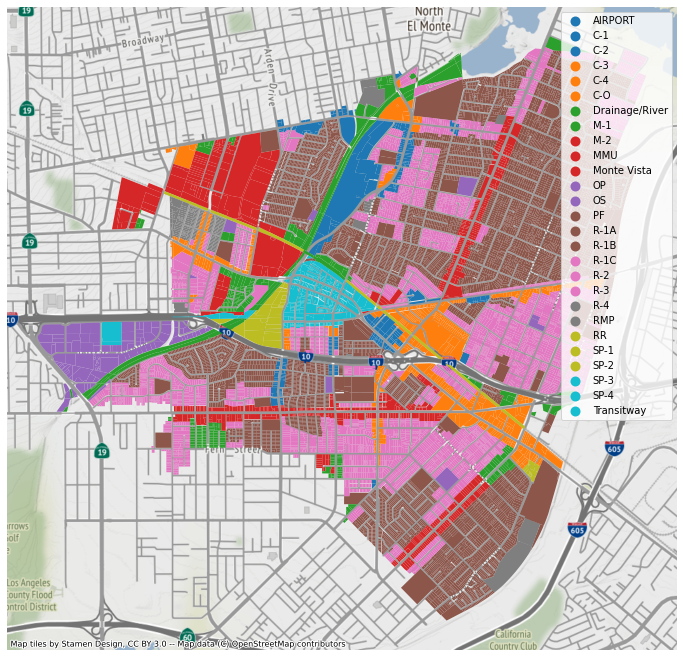

In [107]:
fig, ax = plt.subplots(figsize=(12,12))

zoning_wm.plot(ax=ax,
                      figsize=(20,20),
                      column='zone',
                      legend=True)

ax.axis('off')

ctx.add_basemap(ax)

**Analyzing Mobile Home Park Data for El Monte**

Since this analysis looks at City of El Monte, I will isolate the samples from that city to create a new variable.

In [26]:
elmonte = open.City.value_counts().head(1).index.tolist()
elmonte

[' EL MONTE']

In [28]:
open[open.City == ' EL MONTE'].head()

,Park Name,County,Park Identifier,Park Address,City,Zip,Phone,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry
2,ACORN TP,LOS ANGELES,19-0009-MP,"2818 DURFEE AVE, EL MONTE, CA 91732",EL MONTE,91732,(818) 350-5235,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20,0,0,"PATTERSON, GLEN, PO BOX 1811, MYRTLE CREEK, OR...",34.056116,-118.017002,POINT (-118.01700 34.05612)
6,BEL AIRE MH LODGE,LOS ANGELES,19-0051-MP,"2336 LEXINGTON AVE, EL MONTE, CA 91731",EL MONTE,91731,(310) 444-6411,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",34,0,0,"WONG ASSOCIATES, 444 S FLOWER ST, LOS ANGELES,...",34.059182,-118.038944,POINT (-118.03894 34.05918)
9,SHADY LANE MP,LOS ANGELES,19-0079-MP,"2532 MOUNTAIN VIEW RD, EL MONTE, CA 91731",EL MONTE,91731,(213) 585-8782,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20,0,0,"GHUMAN, DASH, 2532 MOUNTAIN VIEW RD, EL MONTE,...",34.057399,-118.027922,POINT (-118.02792 34.05740)
27,FELIPE TP,LOS ANGELES,19-0218-MP,"12328 FELIPE ST, EL MONTE, CA 91732",EL MONTE,91732,(818) 448-5849,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11,0,0,"HUANG, CHU, 2440 S HACIENDA BLVD #132, HACIEND...",34.051500,-118.021539,POINT (-118.02154 34.05150)
33,VICTORY TRAILER PARK,LOS ANGELES,19-0263-MP,"11208 GARVEY AVE, EL MONTE, CA 91731",EL MONTE,91731,(213) 539-2582,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",3,0,0,"JACKSON, CHOW, 3112 SEAMAN AVE, EL MONTE, CA 9...",34.062747,-118.031829,POINT (-118.03183 34.06275)


In [31]:
monte = open[open['City']== ' EL MONTE']
monte.shape

(29, 16)

In [77]:
monte['total'] = monte['MH Spaces'] + monte['RV Lots W/Drains'] + monte['RV Lots W/O Drains']

In [78]:
monte.head()

,Park Name,County,Park Identifier,Park Address,City,Zip,Phone,Fire Authority,Jurisdiction,MH Spaces,RV Lots W/Drains,RV Lots W/O Drains,Operated by,lat,lon,geometry,total
2,ACORN TP,LOS ANGELES,19-0009-MP,"2818 DURFEE AVE, EL MONTE, CA 91732",EL MONTE,91732,(818) 350-5235,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20,0,0,"PATTERSON, GLEN, PO BOX 1811, MYRTLE CREEK, OR...",34.056116,-118.017002,POINT (-13137592.525 4036339.550),20
6,BEL AIRE MH LODGE,LOS ANGELES,19-0051-MP,"2336 LEXINGTON AVE, EL MONTE, CA 91731",EL MONTE,91731,(310) 444-6411,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",34,0,0,"WONG ASSOCIATES, 444 S FLOWER ST, LOS ANGELES,...",34.059182,-118.038944,POINT (-13140035.153 4036751.510),34
9,SHADY LANE MP,LOS ANGELES,19-0079-MP,"2532 MOUNTAIN VIEW RD, EL MONTE, CA 91731",EL MONTE,91731,(213) 585-8782,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20,0,0,"GHUMAN, DASH, 2532 MOUNTAIN VIEW RD, EL MONTE,...",34.057399,-118.027922,POINT (-13138808.155 4036511.883),20
27,FELIPE TP,LOS ANGELES,19-0218-MP,"12328 FELIPE ST, EL MONTE, CA 91732",EL MONTE,91732,(818) 448-5849,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11,0,0,"HUANG, CHU, 2440 S HACIENDA BLVD #132, HACIEND...",34.051500,-118.021539,POINT (-13138097.624 4035719.271),11
33,VICTORY TRAILER PARK,LOS ANGELES,19-0263-MP,"11208 GARVEY AVE, EL MONTE, CA 91731",EL MONTE,91731,(213) 539-2582,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",3,0,0,"JACKSON, CHOW, 3112 SEAMAN AVE, EL MONTE, CA 9...",34.062747,-118.031829,POINT (-13139243.118 4037230.473),3


Now that I have created the variable, I will export it as a geoson file for future analysis. 

In [79]:
monte.to_file("monte_open.geojson", drive='GeoJSON')

/tmp/ipykernel_90/2431617530.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  monte.to_file("monte_open.geojson", drive='GeoJSON')


In [35]:
# convert pandas dataframe to geodataframe
monte = gpd.GeoDataFrame(monte, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(monte.lon, monte.lat))

In [123]:
# get the layers into a web mercator projection
# reproject to web mercator
monte = monte.to_crs(epsg=3857)

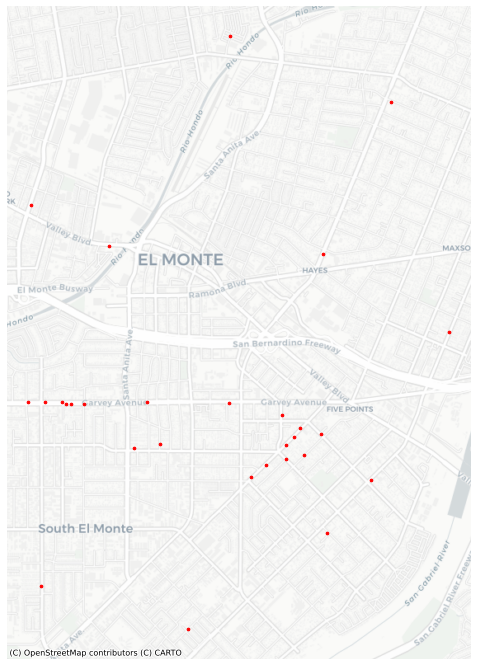

In [124]:
# map it!
fig,ax = plt.subplots(figsize=(12,12))

monte.plot(ax=ax,
             color='red',
             markersize=7)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

**Create a two layer map**

In [125]:
# get the bounding box coordinates for the El Monte MHP data
minx, miny, maxx, maxy = monte.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13141568.495397476
-13136683.65507837
4034606.530889119
4041486.038246411


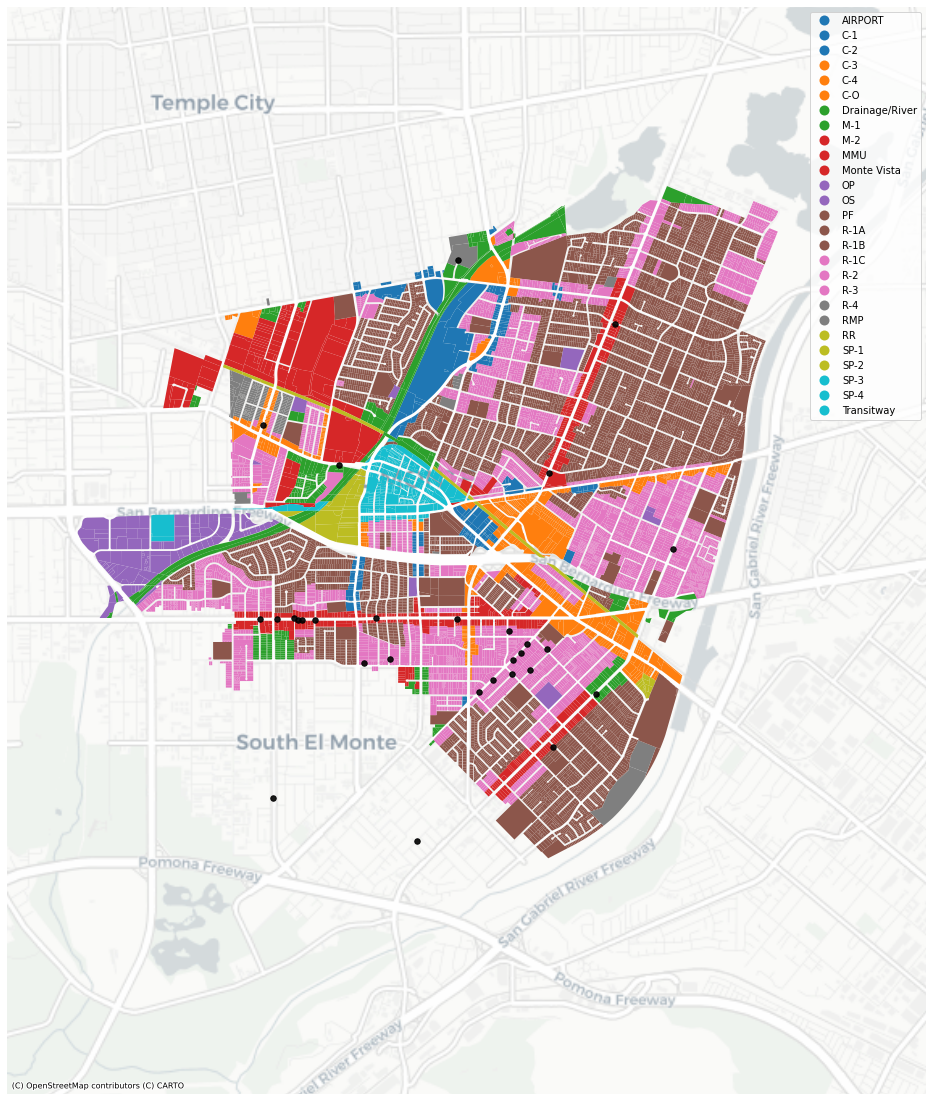

In [136]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(20, 20))

# zoning parcels
zoning_wm.plot(ax=ax,
                figsize=(20,20), 
                column='zone',
                legend=True)


#mobile home parks
monte.plot(ax=ax, # this also puts it in the same ax plot
            color='black',
            markersize=30,
            alpha=0.9)

# use the bounding box coordinates to set the x and y limits
ax.set_xlim(minx - 3000, maxx + 3000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 3000, maxy + 3000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

**Spatial Join**

In [128]:
# Do the spatial join
join = gpd.sjoin(monte, zoning_wm, how='left')
join.head()

,Park Name,County,Park Identifier,Park Address,City,Zip,Phone,Fire Authority,Jurisdiction,MH Spaces,...,Operated by,lat,lon,geometry,total,index_right,zone,building type,neighborhood area,shape.st.lenght
2,ACORN TP,LOS ANGELES,19-0009-MP,"2818 DURFEE AVE, EL MONTE, CA 91732",EL MONTE,91732,(818) 350-5235,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20,...,"PATTERSON, GLEN, PO BOX 1811, MYRTLE CREEK, OR...",34.056116,-118.017002,POINT (-13137592.525 4036339.550),20,NaN,NaN,NaN,NaN,NaN
6,BEL AIRE MH LODGE,LOS ANGELES,19-0051-MP,"2336 LEXINGTON AVE, EL MONTE, CA 91731",EL MONTE,91731,(310) 444-6411,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",34,...,"WONG ASSOCIATES, 444 S FLOWER ST, LOS ANGELES,...",34.059182,-118.038944,POINT (-13140035.153 4036751.510),34,1511.0,R-3,"Low-Rise Apartments, Condos, Townhomes",Mountain View,383.730831
9,SHADY LANE MP,LOS ANGELES,19-0079-MP,"2532 MOUNTAIN VIEW RD, EL MONTE, CA 91731",EL MONTE,91731,(213) 585-8782,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",20,...,"GHUMAN, DASH, 2532 MOUNTAIN VIEW RD, EL MONTE,...",34.057399,-118.027922,POINT (-13138808.155 4036511.883),20,NaN,NaN,NaN,NaN,NaN
27,FELIPE TP,LOS ANGELES,19-0218-MP,"12328 FELIPE ST, EL MONTE, CA 91732",EL MONTE,91732,(818) 448-5849,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",11,...,"HUANG, CHU, 2440 S HACIENDA BLVD #132, HACIEND...",34.051500,-118.021539,POINT (-13138097.624 4035719.271),11,15138.0,MMU,Modern Strip Development,Mountain View,306.464890
33,VICTORY TRAILER PARK,LOS ANGELES,19-0263-MP,"11208 GARVEY AVE, EL MONTE, CA 91731",EL MONTE,91731,(213) 539-2582,"COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...","HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...",3,...,"JACKSON, CHOW, 3112 SEAMAN AVE, EL MONTE, CA 9...",34.062747,-118.031829,POINT (-13139243.118 4037230.473),3,NaN,NaN,NaN,NaN,NaN


In [2]:
# Import necessary modules
import geopandas as gpd

# Set filepath
fp = 'NEW - up206a-project-mobile_homies/AMC notebooks/carson/zoning/data/zones.shp

# Read file using gpd.read_file()
data = gpd.read_file(fp)

DriverError: zones.shp: No such file or directory